In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [16]:
data = pd.read_csv('USA_Housing.csv')

In [17]:
import seaborn as sns

In [18]:
#show columns names
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [19]:
data.rename(columns={'Avg. Area Income': 'median income', 'Avg. Area House Age':'house age', 'Avg. Area Number of Rooms':'rooms',
             'Avg. Area Number of Bedrooms': 'bedrooms'}, inplace=True)


In [20]:
data.head()

,median income,house age,rooms,bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [21]:
data.info

<bound method DataFrame.info of       median income  house age     rooms  bedrooms  Area Population  \
0      79545.458574   5.682861  7.009188      4.09     23086.800503   
1      79248.642455   6.002900  6.730821      3.09     40173.072174   
2      61287.067179   5.865890  8.512727      5.13     36882.159400   
3      63345.240046   7.188236  5.586729      3.26     34310.242831   
4      59982.197226   5.040555  7.839388      4.23     26354.109472   
...             ...        ...       ...       ...              ...   
4995   60567.944140   7.830362  6.137356      3.46     22837.361035   
4996   78491.275435   6.999135  6.576763      4.02     25616.115489   
4997   63390.686886   7.250591  4.805081      2.13     33266.145490   
4998   68001.331235   5.534388  7.130144      5.44     42625.620156   
4999   65510.581804   5.992305  6.792336      4.07     46501.283803   

             Price                                            Address  
0     1.059034e+06  208 Michael Ferry Apt. 

In [22]:
data.describe()

,median income,house age,rooms,bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


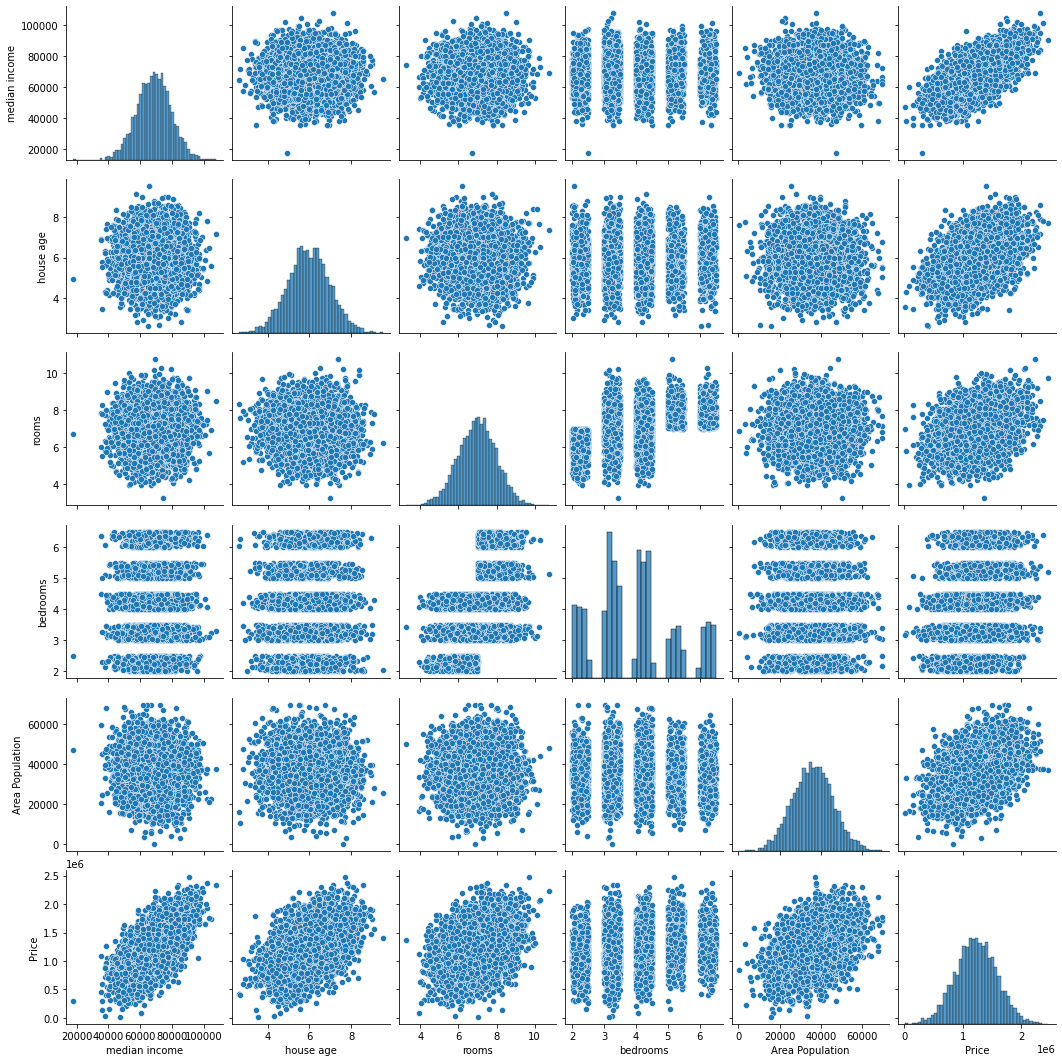

In [23]:
#pairplots for the colums
sns.pairplot(data)

C:\Users\juden\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

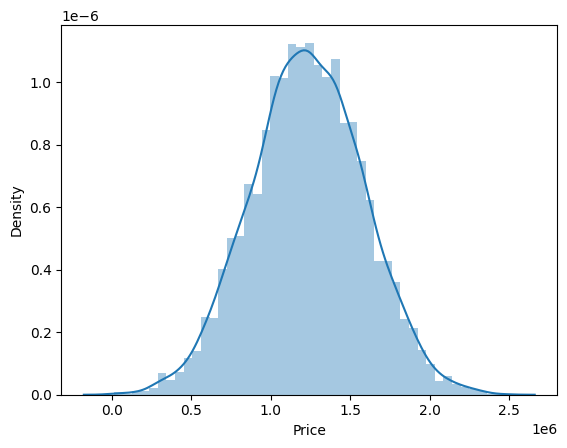

In [24]:
#view freq corrolation to your target column (price)
sns.distplot(data['Price'])


In [25]:
#show correlation between variables
data.corr()

,median income,house age,rooms,bedrooms,Area Population,Price
median income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
house age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<AxesSubplot:>

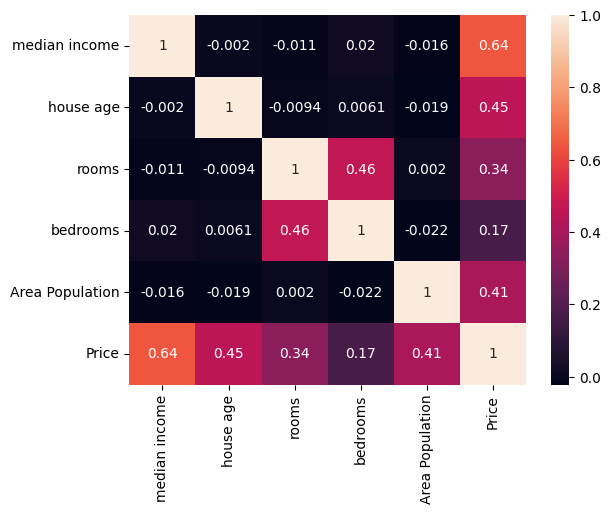

In [26]:
#heatmap
sns.heatmap(data.corr(), annot=True)

In [27]:
data.columns

Index(['median income', 'house age', 'rooms', 'bedrooms', 'Area Population',
       'Price', 'Address'],
      dtype='object')

In [28]:
#1. split data set into features and target value
X = data[['median income', 'house age', 'rooms', 'bedrooms', 'Area Population']]
y = data['Price']


In [29]:
from sklearn.model_selection import train_test_split
#2, split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size =0.4, random_state = 101)

In [30]:
#3. import the linear regression model
from sklearn.linear_model import LinearRegression
#create an instance of linearRegression Class
lm = LinearRegression()
#train my model on my training data
lm.fit(X_train, y_train)

LinearRegression()

In [31]:
lm.intercept_

-2640159.796852678

In [32]:
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [33]:
import pandas as pd
cdf = pd.DataFrame(lm.coef_, X_train.columns, columns=['Coeff'])

In [34]:
cdf

,Coeff
median income,21.528276
house age,164883.282027
rooms,122368.678027
bedrooms,2233.801864
Area Population,15.150420


Making predictions

In [35]:
predictions = lm.predict(X_test)

In [36]:
predictions

array([1260960.70567627,  827588.75560329, 1742421.24254344, ...,
        372191.40626917, 1365217.15140899, 1914519.5417888 ])

In [37]:
predictions.shape

(2000,)

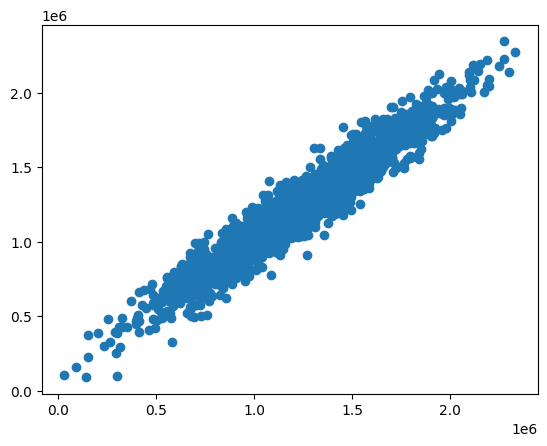

In [39]:
#comparepredictions with actual values
plt.scatter(y_test, predictions)

In [ ]:
#check the distribution of the residuals
